## Kategorik Değişken Analizi

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [5]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["object","category","bool"]]
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [13]:
#1 ve 0 değeri içermelerine rağmen cat_cols ile yakalayamadığımız columnları yakalamak için
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and str(df[col].dtypes) in ["float64","int64"]]
num_but_cat

['survived', 'pclass', 'sibsp', 'parch']

In [14]:
#kategorik tipte olup aslında bilgi değeri taşımayan columnları bulmak için(cardinal)
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["object", "category"]]
cat_but_car
#şuan böyle bi column yok.

[]

In [16]:
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]
df[cat_cols]

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived,pclass,sibsp,parch,survived,pclass,sibsp,parch
0,male,S,Third,man,True,NaN,Southampton,no,False,0,3,1,0,0,3,1,0
1,female,C,First,woman,False,C,Cherbourg,yes,False,1,1,1,0,1,1,1,0
2,female,S,Third,woman,False,NaN,Southampton,yes,True,1,3,0,0,1,3,0,0
3,female,S,First,woman,False,C,Southampton,yes,False,1,1,1,0,1,1,1,0
4,male,S,Third,man,True,NaN,Southampton,no,True,0,3,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True,0,2,0,0,0,2,0,0
887,female,S,First,woman,False,B,Southampton,yes,True,1,1,0,0,1,1,0,0
888,female,S,Third,woman,False,NaN,Southampton,no,False,0,3,1,2,0,3,1,2
889,male,C,First,man,True,C,Cherbourg,yes,True,1,1,0,0,1,1,0,0


In [17]:
df[cat_cols].nunique()

sex            2
embarked       3
class          3
who            3
adult_male     2
deck           7
embark_town    3
alive          2
alone          2
survived       2
pclass         3
sibsp          7
parch          7
survived       2
pclass         3
sibsp          7
parch          7
dtype: int64

In [18]:
[col for col in df.columns if col not in cat_cols]

['age', 'fare']

In [23]:
#Bunlarla alakalı bir fonksiyon yazalım.
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(), "Ratio": dataframe[col_name].value_counts() * 100 / len(dataframe)}))
    print("------------------------------------------------------------------")

In [24]:
cat_summary(df, "sex")

        sex      Ratio
male    577  64.758698
female  314  35.241302
------------------------------------------------------------------


In [25]:
for col in cat_cols:
    cat_summary(df, col)

        sex      Ratio
male    577  64.758698
female  314  35.241302
------------------------------------------------------------------
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
------------------------------------------------------------------
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
------------------------------------------------------------------
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
------------------------------------------------------------------
       adult_male     Ratio
True          537  60.26936
False         354  39.73064
------------------------------------------------------------------
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
------------------------------------------------------------------
             embark_t

        sex      Ratio
male    577  64.758698
female  314  35.241302
------------------------------------------------------------------


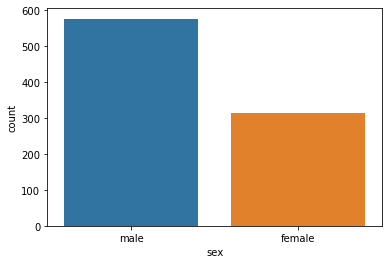

In [26]:
#şimdi bu fonksiyona grafik çizdirme özelliği ekleyelim.
def cat_summary(dataframe, col_name, plot = False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(), "Ratio": dataframe[col_name].value_counts() * 100 / len(dataframe)}))
    print("------------------------------------------------------------------")
    
    if plot:
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show(block = True)
        
cat_summary(df, "sex", True)

        sex      Ratio
male    577  64.758698
female  314  35.241302
------------------------------------------------------------------


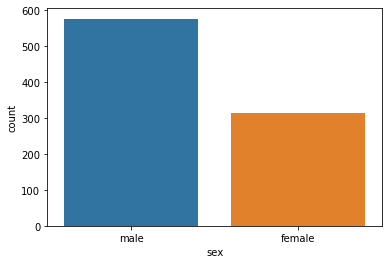

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
------------------------------------------------------------------


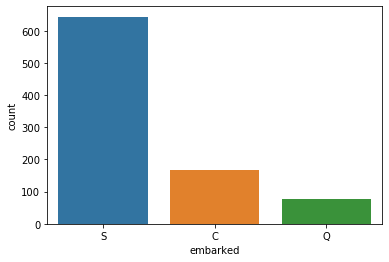

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
------------------------------------------------------------------


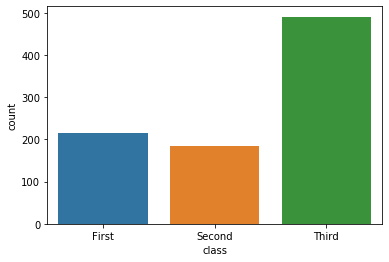

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
------------------------------------------------------------------


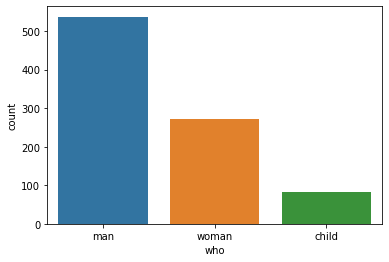

       adult_male     Ratio
True          537  60.26936
False         354  39.73064
------------------------------------------------------------------


ValueError: could not broadcast input array from shape (537,15) into shape (537)

In [27]:
for col in cat_cols:
    cat_summary(df, col, True)

Burda bool değerli bir column denk gelince hata aldık. Bool değerli columnu 1 ve 0'a çevirerek hatadan kurtulalım.

        sex      Ratio
male    577  64.758698
female  314  35.241302
------------------------------------------------------------------


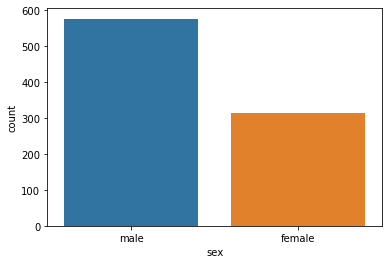

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
------------------------------------------------------------------


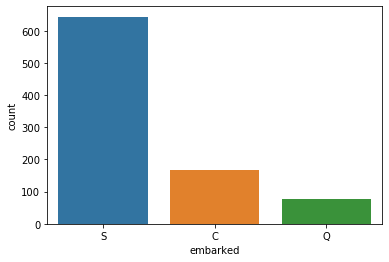

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
------------------------------------------------------------------


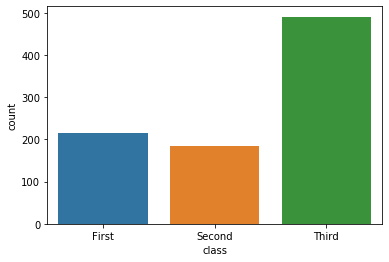

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
------------------------------------------------------------------


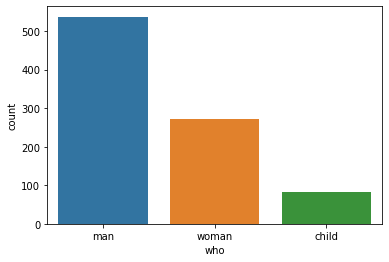

   adult_male     Ratio
1         537  60.26936
0         354  39.73064
------------------------------------------------------------------


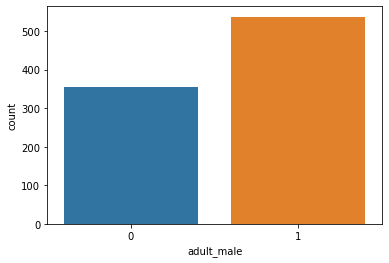

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
------------------------------------------------------------------


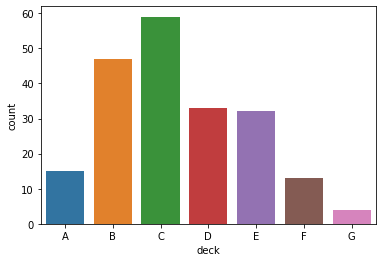

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
------------------------------------------------------------------


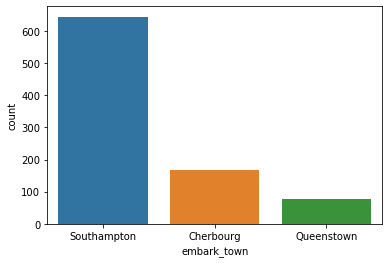

     alive      Ratio
no     549  61.616162
yes    342  38.383838
------------------------------------------------------------------


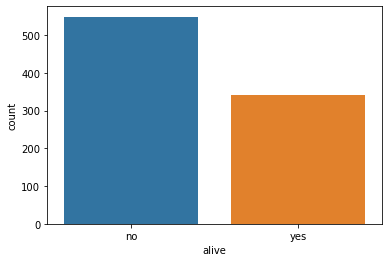

   alone     Ratio
1    537  60.26936
0    354  39.73064
------------------------------------------------------------------


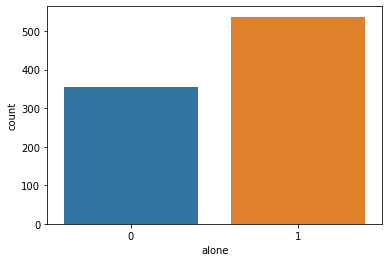

   survived      Ratio
0       549  61.616162
1       342  38.383838
------------------------------------------------------------------


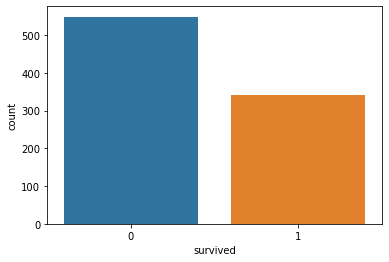

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
------------------------------------------------------------------


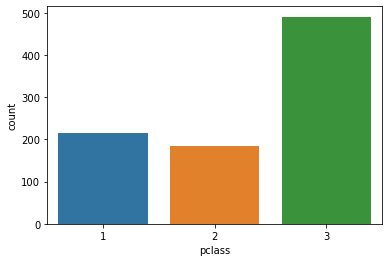

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
------------------------------------------------------------------


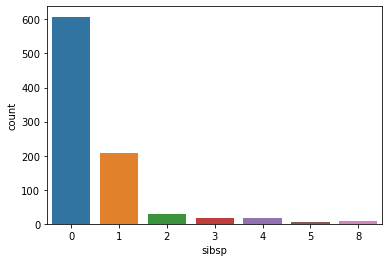

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
------------------------------------------------------------------


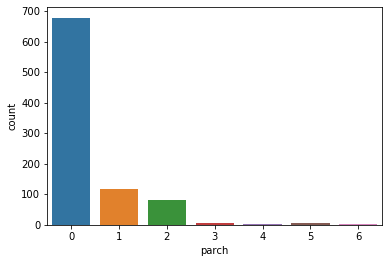

   survived      Ratio
0       549  61.616162
1       342  38.383838
------------------------------------------------------------------


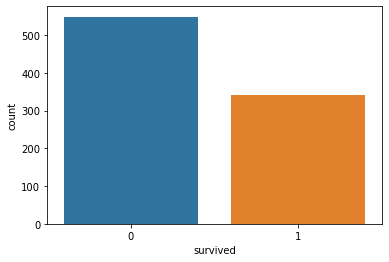

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
------------------------------------------------------------------


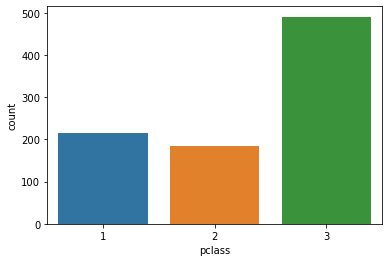

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
------------------------------------------------------------------


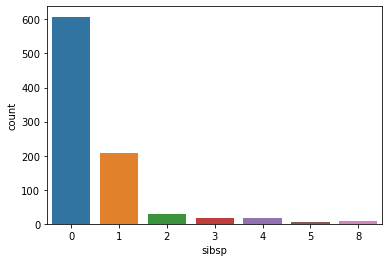

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
------------------------------------------------------------------


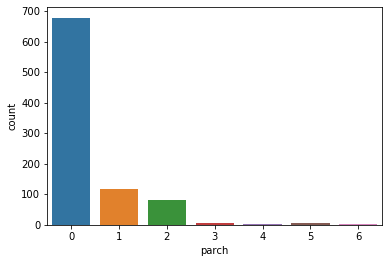

In [28]:
for col in cat_cols:
    if df[col].dtypes == "bool":
        df[col] = df[col].astype(int)
        cat_summary(df, col, True)
    else:
        cat_summary(df, col, True)

## Sayısal Değişken Analizi

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
#öncelikle kategorik columnları bulalım.
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["object","category","bool"]]
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and str(df[col].dtypes) in ["float64","int64"]]
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["object", "category"]]
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]

In [32]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int","float"]]
num_cols = [col for col in num_cols if col not in cat_cols]
num_cols

['age', 'fare']

AGE
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64
-----------------------------------------------


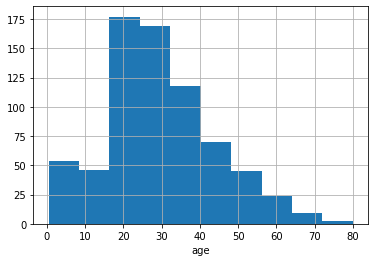

FARE
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64
-----------------------------------------------


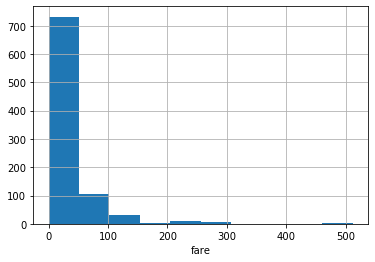

In [41]:
#Şimdi bunları yazdıracak bir fonksiyon yazalım.
def num_summary(dataframe, numerical_cols, plot = False):
    print(numerical_cols.upper())
    print(dataframe[numerical_cols].describe().T)
    print("-----------------------------------------------")
    
    if plot:
        dataframe[numerical_cols].hist()
        plt.xlabel(numerical_cols)
        plt.show(block= True)
        
for col in num_cols:
    num_summary(df,col, True)

## Değişkenlerin Yakalanması ve İşlemleri Genelleştirme

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [43]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    #cat_th = 10 altında farklı değer varsa bu kategoriktir
    #car_th = 20 üzeri farklı değer varsa bu cardinaldir. Bilgi değeri taşımaz.
    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["object","category","bool"]]
    num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and str(df[col].dtypes) in ["float64","int64"]]
    cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["object", "category"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in df.columns if df[col].dtypes in ["int","float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"Categorical Columns : {len(cat_cols)}")
    print(f"Numerical Columns: {len(num_cols)}")
    print(f"Categorical but Cardinal: {len(cat_but_car)}")
    print(f"Numerical but Categorical: {len(num_but_cat)}")
    
    return cat_cols, num_cols, cat_but_car

In [48]:
grab_col_names(df)

Observations: 891
Variables: 15
Categorical Columns : 13
Numerical Columns: 2
Categorical but Cardinal: 0
Numerical but Categorical: 4


(['sex',
  'embarked',
  'class',
  'who',
  'adult_male',
  'deck',
  'embark_town',
  'alive',
  'alone',
  'survived',
  'pclass',
  'sibsp',
  'parch'],
 ['age', 'fare'],
 [])

In [55]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 15
Categorical Columns : 13
Numerical Columns: 2
Categorical but Cardinal: 0
Numerical but Categorical: 4


## Hedef Değişken Analizi

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [57]:
df.groupby("sex")["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [67]:
#yukarıdaki işlemin fonksiyonunu yazalım.
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET MEAN": dataframe.groupby(categorical_col)[target].mean()}))
    print("---------------------------")

In [69]:
for col in cat_cols:
    target_summary_with_cat(df, "survived", col)

        TARGET MEAN
sex                
female     0.742038
male       0.188908
---------------------------
          TARGET MEAN
embarked             
C            0.553571
Q            0.389610
S            0.336957
---------------------------
        TARGET MEAN
class              
First      0.629630
Second     0.472826
Third      0.242363
---------------------------
       TARGET MEAN
who               
child     0.590361
man       0.163873
woman     0.756458
---------------------------
            TARGET MEAN
adult_male             
False          0.717514
True           0.163873
---------------------------
      TARGET MEAN
deck             
A        0.466667
B        0.744681
C        0.593220
D        0.757576
E        0.750000
F        0.615385
G        0.500000
---------------------------
             TARGET MEAN
embark_town             
Cherbourg       0.553571
Queenstown      0.389610
Southampton     0.336957
---------------------------
       TARGET MEAN
alive            

In [70]:
df.groupby("survived")["age"].mean()

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

In [71]:
#bunun da fonksiyonunu yazalım. bunu agg kullanarak yazalım.
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}))
    print("-----------------------------------------")

In [72]:
for col in num_cols:
    target_summary_with_num(df, "survived", col)

                age
survived           
0         30.626179
1         28.343690
-----------------------------------------
               fare
survived           
0         22.117887
1         48.395408
-----------------------------------------


## Korelasyon Analizi

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
df = pd.read_csv("data.csv")
df = df.iloc[:,1: -1]
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [84]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int","float"]]

In [85]:
corr = df[num_cols].corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


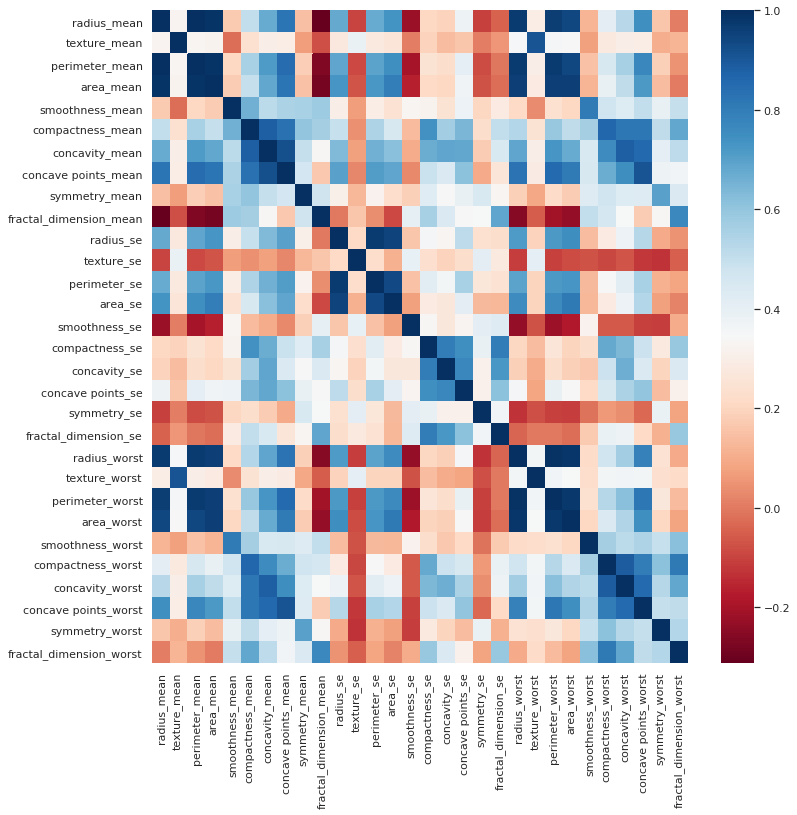

In [87]:
sns.set(rc = {"figure.figsize": (12,12)})
sns.heatmap(corr, cmap = "RdBu")
plt.show()